In [1]:
import pypelines.supervised_pipeline as pipe
from pypelines import utils

### regression

In [2]:
utils.list_supported_models(model_type='regression')

['Elastic Net Regression',
 'Linear Regression',
 'Lasso Regression',
 'Ridge Regression',
 'SGD Regressor Regression',
 'Histogram Gradient Boost Regression',
 'Random Forest Regression',
 'AdaBoost Regression',
 'Poisson Regression',
 'Decision Tree Regression',
 'GBT Regression',
 'ExtraTree Regression',
 'GPR Regression',
 'Bayesian ARD Regression',
 'Bayesian Ridge Regression',
 'Quantile Regression',
 'Huber Regression',
 'TheilSen Regression',
 'Passive Aggressive Regression',
 'Gamma Regression',
 'Tweedie Regression',
 'OMP Regression',
 'LassoLars Regression',
 'RANSAC Regression']

In [3]:
import pandas as pd
housing = pd.read_csv("pypelines/datasets/regression/housing.csv")

### regression - all models

In [4]:
reg_pypelines_all = pipe.SupervisedPipeline(data = housing,target = 'median_house_value'
                            , model_type = 'regression'
                            , models = ['Linear Regression','Lasso Regression']
                            , nfolds = 5)

In [5]:
reg_pypelines_all.get_hyperparameters()

{'Linear Regression': {'numerical': [],
  'categorical': [{'search': False,
    'name': 'fit_intercept',
    'selected': [True],
    'values': [True, False]}]},
 'Lasso Regression': {'numerical': [{'search': True,
    'name': 'alpha',
    'min': 0,
    'max': 2,
    'step': 0.5},
   {'search': False,
    'name': 'max_iter',
    'min': 100,
    'max': 1000,
    'step': 100}],
  'categorical': [{'search': False,
    'name': 'fit_intercept',
    'selected': [True],
    'values': [True, False]}]}}

In [6]:
reg_pypelines_all.model_list()

['Linear Regression', 'Lasso Regression']


In [7]:
reg_pypelines_all.code_to_file(path = 'code_output/')

'model files saved to code_output/'

In [8]:
reg_pypelines_all.code_to_clipboard()

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']
[]
Fitting 5 folds for each of 1 candidates, totalling 5 fits
     model    metric     value
0  lin_reg  r2_score  0.625411


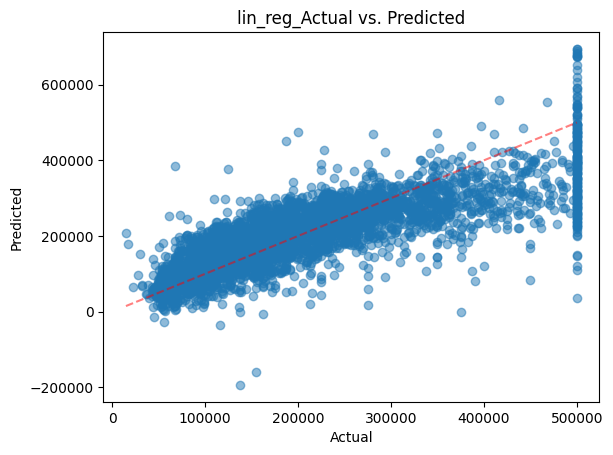

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\Kreshnaa Raam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Kreshnaa Raam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Kreshnaa Raam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.088e+13, tolerance: 1.755e+10 Linear regression models with null weight for the l1 regularization term are more efficie

              model    metric     value
0  lasso_regression  r2_score  0.625396


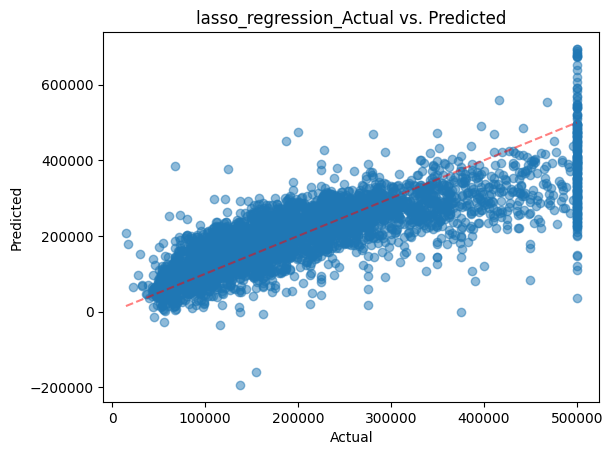

              model    metric     value
0           lin_reg  r2_score  0.625411
0  lasso_regression  r2_score  0.625396


'The best model is lin_reg with 0.6254109362838376 as r2_score'

In [10]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# target dataframe: housing
target = "median_house_value"
features = list(housing.columns.drop("median_house_value"))
feature_df = housing[features]

# get numerical and categorical columns
bool_cols = feature_df.select_dtypes(include=['bool']).columns.tolist()
housing[bool_cols] = feature_df[bool_cols].astype(int)
numerical_cols = feature_df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = feature_df.select_dtypes(include=['object']).columns.tolist()
text_cols = feature_df.select_dtypes(include=['string']).columns.tolist()


sample_size = np.min([10000, housing.shape[0]])
unique_theshold = np.min([100, sample_size/10])

# check categorical columns for high cardinality and make it text column
for col in categorical_cols:
    if housing[col].sample(sample_size).nunique() > unique_theshold:
        text_cols.append(col)
        categorical_cols.remove(col)
        

# check text columns for low cardinality and make it categorical columns
for col in text_cols:
    if housing[col].sample(sample_size).nunique() < unique_theshold:
        categorical_cols.append(col)
        text_cols.remove(col)

print(numerical_cols)
print(categorical_cols)
print(text_cols)

# define numeric transformer steps
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())]
)

# define categorical transformer steps
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# define text transformer steps
text_transformer = Pipeline(
    steps=[
        ('text', TfidfVectorizer())
    ]
)

# create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer , numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        *[(f'text_{t_col}', text_transformer, t_col) for t_col in text_cols]]
)

# train test split
X = housing[features]
y = housing[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_comparison_list = []

##### End of Data Processing Pipeline #####


##### Model Pipeline for Linear Regression #####

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,make_scorer,r2_score,explained_variance_score
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
lin_reg_param_grid = {
}


# Create the pipeline
lin_reg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lin_reg', LinearRegression())
])

# Create the grid search
lin_reg_grid_search = GridSearchCV(estimator=lin_reg_pipe, param_grid=lin_reg_param_grid, cv=5, scoring=make_scorer(mean_squared_error), verbose=1)
lin_reg_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
lin_reg_best_estimator = lin_reg_grid_search.best_estimator_

# Store results as a dataframe  
lin_reg_search_results = pd.DataFrame(lin_reg_grid_search.cv_results_)

# Model metrics

# Generate Predictions
lin_reg_predictions = pd.DataFrame(lin_reg_best_estimator.predict(X_test))

# Generate Model Metrics
lin_reg_r2_score = r2_score(y_test, lin_reg_predictions.iloc[:,0])
lin_reg_mean_squared_error = mean_squared_error(y_test, lin_reg_predictions.iloc[:,0])
lin_reg_explained_variance_score = explained_variance_score(y_test, lin_reg_predictions.iloc[:,0])
lin_reg_performance_metrics = [['lin_reg','r2_score', lin_reg_r2_score], 
                                  ['lin_reg','mean_squared_error',lin_reg_mean_squared_error],
                                  ['lin_reg','explained_variance_score', lin_reg_explained_variance_score]]
lin_reg_performance_metrics = pd.DataFrame(lin_reg_performance_metrics, columns=['model','metric', 'value'])

# Generate Actual vs Predicted Plot
lin_reg_actual_predicted_plot, lin_reg_actual_predicted_plot_ax = plt.subplots()
lin_reg_actual_predicted_plot = lin_reg_actual_predicted_plot_ax.scatter(x=y_test, y=lin_reg_predictions.iloc[:,0], alpha=0.5)
# Add diagonal line
lin_reg_actual_predicted_plot_ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.5)
# Set axis labels and title
lin_reg_actual_predicted_plot_ax.set_xlabel('Actual')
lin_reg_actual_predicted_plot_ax.set_ylabel('Predicted')
lin_reg_actual_predicted_plot_ax.set_title(f'lin_reg_Actual vs. Predicted')

# Generate Decile Lift Chart

print(lin_reg_performance_metrics[lin_reg_performance_metrics['metric'] == 'r2_score'])

plt.show(block=False)



model_comparison_list.append(lin_reg_performance_metrics)
##### Model Pipeline for Lasso Regression #####

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,make_scorer,r2_score,explained_variance_score
import matplotlib.pyplot as plt
lasso_regression_param_grid = {
"lasso_regression__alpha": np.arange(0.0, 2.0, 0.5),
}


# Create the pipeline
lasso_regression_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso_regression', Lasso())
])

# Create the grid search
lasso_regression_grid_search = GridSearchCV(estimator=lasso_regression_pipe, param_grid=lasso_regression_param_grid, cv=5, scoring=make_scorer(mean_squared_error), verbose=1)
lasso_regression_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
lasso_regression_best_estimator = lasso_regression_grid_search.best_estimator_

# Store results as a dataframe  
lasso_regression_search_results = pd.DataFrame(lasso_regression_grid_search.cv_results_)

# Model metrics

# Generate Predictions
lasso_regression_predictions = pd.DataFrame(lasso_regression_best_estimator.predict(X_test))

# Generate Model Metrics
lasso_regression_r2_score = r2_score(y_test, lasso_regression_predictions.iloc[:,0])
lasso_regression_mean_squared_error = mean_squared_error(y_test, lasso_regression_predictions.iloc[:,0])
lasso_regression_explained_variance_score = explained_variance_score(y_test, lasso_regression_predictions.iloc[:,0])
lasso_regression_performance_metrics = [['lasso_regression','r2_score', lasso_regression_r2_score], 
                                  ['lasso_regression','mean_squared_error',lasso_regression_mean_squared_error],
                                  ['lasso_regression','explained_variance_score', lasso_regression_explained_variance_score]]
lasso_regression_performance_metrics = pd.DataFrame(lasso_regression_performance_metrics, columns=['model','metric', 'value'])

# Generate Actual vs Predicted Plot
lasso_regression_actual_predicted_plot, lasso_regression_actual_predicted_plot_ax = plt.subplots()
lasso_regression_actual_predicted_plot = lasso_regression_actual_predicted_plot_ax.scatter(x=y_test, y=lasso_regression_predictions.iloc[:,0], alpha=0.5)
# Add diagonal line
lasso_regression_actual_predicted_plot_ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.5)
# Set axis labels and title
lasso_regression_actual_predicted_plot_ax.set_xlabel('Actual')
lasso_regression_actual_predicted_plot_ax.set_ylabel('Predicted')
lasso_regression_actual_predicted_plot_ax.set_title(f'lasso_regression_Actual vs. Predicted')

# Generate Decile Lift Chart

print(lasso_regression_performance_metrics[lasso_regression_performance_metrics['metric'] == 'r2_score'])

plt.show(block=False)



model_comparison_list.append(lasso_regression_performance_metrics)
##### Model Metrics Lasso Regression #####

table = pd.concat(model_comparison_list)
table = table.sort_values(by=['value'], ascending=False)
table = table[table['metric'] == 'r2_score']
print(table)
f"The best model is {table['model'].iloc[0]} with {table['value'].iloc[0]} as {table['metric'].iloc[0]}" 


##### End of Model Pipeline for Lasso Regression #####

### classification

In [ ]:
titanic = pd.read_csv("pypelines/datasets/classification/titanic.csv")

In [ ]:
# code output
clf_pypelines_all = pipe.SupervisedPipeline(data = titanic,target = 'Survived'
                            , model_type = 'classification'
                            , models = ['Logistic Regression',
                                        'Random Forest Classifier']
                            , nfolds = 5)

In [ ]:
clf_pypelines_all.get_hyperparameters()

In [ ]:
clf_pypelines_all.code_to_clipboard()

### classification - all models

### Update grid search for a model

In [ ]:
clf_pypelines_all.model_grid_search_settings(model_name="Random Forest Classifier")

In [ ]:
rf_updated_dict = {'numerical': [{'search': True,
   'name': 'n_estimators',
   'min': 100,
   'max': 1000,
   'step': 20},
  {'search': True, 'name': 'max_depth', 'min': 2, 'max': 10, 'step': 2},
  {'search': True,
   'name': 'min_samples_split',
   'min': 0.50,
   'max': 1,
   'step': 0.1},
  {'search': True,
   'name': 'min_samples_leaf',
   'min': 1,
   'max': 10,
   'step': 2}],
 'categorical': [{'search': False,
   'name': 'criterion',
   'selected': ['gini'],
   'values': ['gini', 'entropy']},
  {'search': False,
   'name': 'max_features',
   'selected': ['sqrt'],
   'values': ['auto', 'sqrt', 'log2']},
  {'search': False,
   'name': 'bootstrap',
   'selected': [True],
   'values': [True, False]},
  {'search': True,
   'name': 'oob_score',
   'selected': [True],
   'values': [True, False]},
  {'search': False,
   'name': 'warm_start',
   'selected': [False],
   'values': [True, False]},
  {'search': False,
   'name': 'class_weight',
   'selected': ['balanced'],
   'values': ['balanced', 'balanced_subsample']}]}

In [ ]:
# Example list of dictionaries
dict_list = [rf_updated_dict]

# Loop through each dictionary in the list
for i, rf_dict in enumerate(dict_list):
    # Format the dictionary
    formatted_dict = {
        'numerical': [
            {'search': param['search'], 'name': param['name'], 'min': param['min'], 'max': param['max'], 'step': param['step']}
            for param in rf_dict['numerical']
        ],
        'categorical': [
            {'search': param['search'], 'name': param['name'], 'selected': param['selected'], 'values': param['values']}
            for param in rf_dict['categorical']
        ]
    }
    # Replace the original dictionary with the formatted one
    dict_list[i] = formatted_dict


In [ ]:
clf_pypelines_all.set_model_grid_search_settings(hyperparam_dict=rf_updated_dict,model_name = 'Random Forest Classifier')

In [ ]:
from jinja2 import Template
t = Template("Hello {{ token }}!")
#t.render(token="Jinja2")


d = Template("""
print({{prefix}}_performance_metrics) 
plt.show(block=False)
""")

d.render()